In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [ ]:
data_path = "/content/drive/MyDrive/20212/THDL/data/after_matching/"
dupplicated_data = data_path + "data_duplicated.csv"
mappped_data = data_path + "data_mapped.csv"

In [ ]:
src_mapped_df = pd.read_csv(mappped_data)

In [ ]:
src_dup_df = pd.read_csv(dupplicated_data)

# **Chuẩn hóa lại dữ liệu** 

In [ ]:
save_path = data_path + "data_final.csv"
save_path_dup = data_path + "data_duplicated_final.csv"

In [ ]:
#Check số lượng thành phố
src_mapped_df['City'].unique()

array(['Hà Nội', 'TP. Hồ Chí Minh', 'Đà Lạt', 'Đà Nẵng', 'Nha Trang',
       'Phú Quốc', '1', 'Vũng Tàu', 'Hạ Long', 'Đảo Phú Quốc',
       'Vũng Tàu', 'Ha Long', 'Hồ Chí Minh', 'Hà Nội', 'Hạ Long'],
      dtype=object)

In [ ]:
src_mapped_df[src_mapped_df['City']=='1']

,Image,new_name,new_add,ID,Cluster,Website,City,Hotel name,Url,Address,Stars,Price,Rating,Number of reviews,Reviews,Facilities,Description,Nearby places
3692,1,1,1,3961,NaN,NaN,1,1,1,1,1.0,1,1.0,1,1,1,1,1


Nhận thấy dữ liệu sau khi mapping chưa ổn định về số lượng thành phố --> Chuẩn hóa lại và xóa đi bản ghi thừa (3692)

In [ ]:
src_mapped_df['City'] = np.where(src_mapped_df['City'] == 'Hà Nội', 'Hà Nội', src_mapped_df['City'])
src_mapped_df['City'] = np.where(src_mapped_df['City'] == 'Vũng Tàu', 'Vũng Tàu', src_mapped_df['City'])
src_mapped_df['City'] = np.where(src_mapped_df['City'] == 'Đảo Phú Quốc', 'Phú Quốc', src_mapped_df['City'])
src_mapped_df['City'] = np.where(src_mapped_df['City'] == 'Hồ Chí Minh', 'TP. Hồ Chí Minh', src_mapped_df['City'])
src_mapped_df['City'] = np.where(src_mapped_df['City'] == 'Hạ Long', 'Hạ Long', src_mapped_df['City'])
src_mapped_df['City'] = np.where(src_mapped_df['City'] == 'Ha Long', 'Hạ Long', src_mapped_df['City'])

In [ ]:
#Lọc bỏ bản ghi thừa
src_mapped_df = src_mapped_df.drop([3692])
#Reset lại index
src_mapped_df = src_mapped_df.reset_index(drop=True)

In [ ]:
src_mapped_df['City'].unique()

array(['Hà Nội', 'TP. Hồ Chí Minh', 'Đà Lạt', 'Đà Nẵng', 'Nha Trang',
       'Phú Quốc', 'Vũng Tàu', 'Hạ Long'], dtype=object)

In [ ]:
#Kiểm tra giá trị sao
src_mapped_df['Stars'].loc[src_mapped_df['Stars']>5]

4552    25.0
4565    45.0
4567    45.0
4569    35.0
4573    15.0
        ... 
5280    35.0
5283    25.0
5289    25.0
5300    25.0
5301    15.0
Name: Stars, Length: 167, dtype: float64

Nhận thấy, các giá trị này, thật ra là 2.5 sao hoặc 3.5 sao,... --> Chia cho 10 để thu được số sao thực sự

In [ ]:
src_mapped_df['Stars'] = np.where(src_mapped_df['Stars'] > 5, src_mapped_df['Stars']/10 , src_mapped_df['Stars'])

In [ ]:
#Lưu src_mapped
# src_mapped_df.to_csv(save_path, index=False, encoding='utf8')

Dành cho file dupplicated

In [ ]:
#Check số lượng thành phố
src_dup_df['City'].unique()

array(['Hà Nội', 'TP. Hồ Chí Minh', 'Đà Lạt', 'Đà Nẵng', 'Nha Trang',
       'Phú Quốc', 'Vũng Tàu', 'Hạ Long', 'Vũng Tàu', 'Hồ Chí Minh',
       'Hà Nội', 'Hạ Long'], dtype=object)

In [ ]:
src_dup_df['City'] = np.where(src_dup_df['City'] == 'Hà Nội', 'Hà Nội', src_dup_df['City'])
src_dup_df['City'] = np.where(src_dup_df['City'] == 'Vũng Tàu', 'Vũng Tàu', src_dup_df['City'])
src_dup_df['City'] = np.where(src_dup_df['City'] == 'Hồ Chí Minh', 'TP. Hồ Chí Minh', src_dup_df['City'])
src_dup_df['City'] = np.where(src_dup_df['City'] == 'Hạ Long', 'Hạ Long', src_dup_df['City'])

In [ ]:
src_dup_df['Stars'] = np.where(src_dup_df['Stars'] > 5, src_dup_df['Stars']/10 , src_dup_df['Stars'])

In [ ]:
# src_dup_df.to_csv(save_path_dup, index=False, encoding='utf8')

# **Check dữ liệu sau khi mapping**

In [ ]:
#Số lượng bản ghi và số thuộc tính trong CSDL
print("Số bản ghi thu thập được là: " + str(src_mapped_df.shape[0]))
print("Số thuộc tính có trong nguồn là: " + str(src_mapped_df.shape[1]))

Số bản ghi thu thập được là: 7060
Số thuộc tính có trong nguồn là: 18


In [ ]:
#Check null và thông tin tổng quan
src_mapped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7060 entries, 0 to 7059
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Image              7056 non-null   object 
 1   new_name           7054 non-null   object 
 2   new_add            7057 non-null   object 
 3   ID                 7060 non-null   int64  
 4   Cluster            572 non-null    float64
 5   Website            7060 non-null   object 
 6   City               7060 non-null   object 
 7   Hotel name         7060 non-null   object 
 8   Url                7060 non-null   object 
 9   Address            7060 non-null   object 
 10  Stars              7060 non-null   float64
 11  Price              7060 non-null   int64  
 12  Rating             7060 non-null   float64
 13  Number of reviews  7060 non-null   int64  
 14  Reviews            4735 non-null   object 
 15  Facilities         6997 non-null   object 
 16  Description        6291 

In [ ]:
src_mapped_df.describe()

,ID,Cluster,Stars,Price,Rating,Number of reviews
count,7060.000000,572.000000,7060.000000,7.060000e+03,7060.000000,7060.000000
mean,3778.618272,286.500000,2.264943,1.494647e+06,7.084873,176.334419
std,2242.782146,165.266452,1.578703,5.234637e+06,3.171041,414.244333
min,1.000000,1.000000,0.000000,2.080400e+04,0.000000,0.000000
25%,1800.750000,143.750000,1.000000,4.100000e+05,7.300000,4.000000
50%,3783.500000,286.500000,3.000000,6.500000e+05,8.400000,36.500000
75%,5638.250000,429.250000,3.000000,1.100000e+06,8.900000,164.000000
max,7745.000000,572.000000,5.000000,3.391889e+08,10.000000,6441.000000


In [ ]:
src_mapped_df.head(3)

,Image,new_name,new_add,ID,Cluster,Website,City,Hotel name,Url,Address,Stars,Price,Rating,Number of reviews,Reviews,Facilities,Description,Nearby places
0,https://cf.bstatic.com/xdata/images/hotel/max5...,hanzregalhanoi,90phamhuythongbadinhhanoivietnam,1,NaN,booking.com,Hà Nội,Khách sạn HANZ Regal Hotel Hanoi,https://www.booking.com/hotel/vn/90-pham-huy-t...,"90 Pham Huy Thong, Quận Ba Đình, Hà Nội, Viê...",2.0,421890,7.8,86,"máy lạnh mát, wifi trong từng phòng nên mạnh, ...",Xe đưa đón sân bay;Wi-Fi miễn phí;Phòng gi...,\r\nBạn đủ điều kiện nhận giảm giá Genius tại ...,"Hồ Ngọc Khánh, 0,3 km;Trung tâm thương mại Vin..."
1,https://cf.bstatic.com/xdata/images/hotel/max5...,lanuevaboutiquehanoi,32losuhoankiemhanoivietnam,2,NaN,booking.com,Hà Nội,Khách sạn La Nueva Boutique Hotel Hanoi & Spa,https://www.booking.com/hotel/vn/hanoi-eleganc...,"32 Lo Su Street, Quận Hoàn Kiếm, Hà Nội, Viê...",4.0,1316000,9.3,209,"Địa điểm tuyệt vời, đi một xíu là ra đến hồ Gư...",Xe đưa đón sân bay;Phòng không hút thuốc;T...,\r\nBạn đủ điều kiện nhận giảm giá Genius tại ...,"Nhà hát múa rối Thăng Long, 0,1 km;Đền Ngọc Sơ..."
2,https://cf.bstatic.com/xdata/images/hotel/max5...,lastoriaruby,3yenthaihoankiemhanoivietnam,3,NaN,booking.com,Hà Nội,Khách sạn La Storia Ruby Hotel,https://www.booking.com/hotel/vn/hanoi-eleganc...,"3 Yen Thai Street, Quận Hoàn Kiếm, Hà Nội, V...",3.0,625000,9.6,217,- vị trí gần hồ gươm rất tiện cho việc đi bộ q...,Xe đưa đón sân bay;Phòng không hút thuốc;W...,\r\nBạn đủ điều kiện nhận giảm giá Genius tại ...,"Quảng Trường Đông Kinh Nghĩa Thục, 0,4 km;Nhà ..."


Khi EDA, ta không quan tâm đến những trường thuộc tính sinh ra trong quá trình matching và mapping --> Lọc bỏ những cột này

# **Chuẩn bị dữ liệu EDA**

In [ ]:
#src_mapped_df.drop(["new_name", "new_add", "ID", "Cluster", "Website"], axis = 1, inplace = True)
needed_cols = ['City', 'Hotel name', 'Stars', 'Price', 'Rating', 'Number of reviews', 'Facilities', 'Nearby places']

In [ ]:
eda_hotels = src_mapped_df[needed_cols]

In [ ]:
eda_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7060 entries, 0 to 7059
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7060 non-null   object 
 1   Hotel name         7060 non-null   object 
 2   Stars              7060 non-null   float64
 3   Price              7060 non-null   int64  
 4   Rating             7060 non-null   float64
 5   Number of reviews  7060 non-null   int64  
 6   Facilities         6997 non-null   object 
 7   Nearby places      6949 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 441.4+ KB


In [ ]:
eda_hotels.head()

,City,Hotel name,Stars,Price,Rating,Number of reviews,Facilities,Nearby places
0,Hà Nội,Khách sạn HANZ Regal Hotel Hanoi,2.0,421890,7.8,86,Xe đưa đón sân bay;Wi-Fi miễn phí;Phòng gi...,"Hồ Ngọc Khánh, 0,3 km;Trung tâm thương mại Vin..."
1,Hà Nội,Khách sạn La Nueva Boutique Hotel Hanoi & Spa,4.0,1316000,9.3,209,Xe đưa đón sân bay;Phòng không hút thuốc;T...,"Nhà hát múa rối Thăng Long, 0,1 km;Đền Ngọc Sơ..."
2,Hà Nội,Khách sạn La Storia Ruby Hotel,3.0,625000,9.6,217,Xe đưa đón sân bay;Phòng không hút thuốc;W...,"Quảng Trường Đông Kinh Nghĩa Thục, 0,4 km;Nhà ..."
3,Hà Nội,Khách sạn LeaH Silk Hotel,4.0,1800000,9.1,72,1 hồ bơi;Xe đưa đón sân bay;Phòng không hút...,"Nhà thờ Thánh Joseph, 0,3 km;Quảng Trường Đông..."
4,Hà Nội,Khách sạn Babylon Premium Hotel & Spa,4.0,1262250,9.4,627,Xe đưa đón sân bay;Phòng không hút thuốc;T...,"Quảng Trường Đông Kinh Nghĩa Thục, 0,3 km;Nhà ..."


In [ ]:
#Check số lượng thành phố
# eda_hotels['City'].unique()

In [ ]:
# eda_hotels[eda_hotels['City']=='1']

In [ ]:
# eda_hotels['City'] = np.where(eda_hotels['City'] == 'Hà Nội', 'Hà Nội', eda_hotels['City'])
# eda_hotels['City'] = np.where(eda_hotels['City'] == 'Vũng Tàu', 'Vũng Tàu', eda_hotels['City'])
# eda_hotels['City'] = np.where(eda_hotels['City'] == 'Đảo Phú Quốc', 'Phú Quốc', eda_hotels['City'])
# eda_hotels['City'] = np.where(eda_hotels['City'] == 'Hồ Chí Minh', 'TP. Hồ Chí Minh', eda_hotels['City'])
# eda_hotels['City'] = np.where(eda_hotels['City'] == 'Hạ Long', 'Hạ Long', eda_hotels['City'])
# eda_hotels['City'] = np.where(eda_hotels['City'] == 'Ha Long', 'Hạ Long', eda_hotels['City'])

In [ ]:
# eda_hotels = eda_hotels.drop([3692])

In [ ]:
# eda_hotels = eda_hotels.reset_index(drop=True)

# **EDA về City**

In [ ]:
citys_df = eda_hotels.copy(deep=True)


*   **Phân bố số lượng KS theo từng thành phố**

In [ ]:
# Thêm cột để tiện eda
citys_df.loc[citys_df['Stars'] < 4, 'Stars'] = 0
citys_df.loc[citys_df['Stars'] >= 4, 'Stars'] = 1
citys_df.loc[citys_df['Rating'] < 9.0, 'Rating'] = 0
citys_df.loc[citys_df['Rating'] >= 9.0, 'Rating'] = 1

In [ ]:
#Số lượng KS mỗi thành phố
df = citys_df.groupby(['City'])['City'].count()
#df=df.sort_values(ascending=True)

Text(0, 0.5, 'Thành phố')

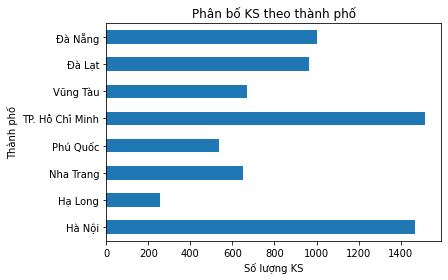

In [ ]:
#matplotlib.style.use('fivethirtyeight')
#sns.set_style("dark")
#df.plot(kind="bar", title="test")
df.plot(kind="barh", title="test")
#plt.xticks(rotation=60, horizontalalignment="center")
plt.title("Phân bố KS theo thành phố")
plt.xlabel("Số lượng KS")
plt.ylabel("Thành phố")



*   **Phân bố số lượng khác sạn theo mức sao (>=4 sao)**
*   **Phân bố số lượng khác sạn theo mức rating (>=9.0 điểm)**



In [ ]:
# # Query the database for Quantity greater than 3
# df_g = citys_df.query("`Stars` < 4")
 
# # Filter out labels of interest
# df_g = df_g.filter(['City', 'Stars'])
 
# # Group the value according to a condition
# demo1 = df_g.groupby('City').count()
# print(demo1)

In [ ]:
df = citys_df.groupby(['City','Stars'])['City'].count()

In [ ]:
star_0 = []
star_1 = []
for i in range(len(df)):
  if (i%2==0):
    star_0.append(df[i])
  else:
    star_1.append(df[i])

# print(star_0)
# print(star_1)

In [ ]:
df = citys_df.groupby(['City','Rating'])['City'].count()

In [ ]:
rate_0 = []
rate_1 = []
for i in range(len(df)):
  if (i%2==0):
    rate_0.append(df[i])
  else:
    rate_1.append(df[i])
# print(rate_0)
# print(rate_1)

In [ ]:
#Tạo df mới chứa các columns cần thiết
city_name = {'City':{0:'Hà Nội', 1:'Hạ Long', 2:'Nha Trang', 3:'Phú Quốc',
             4:'TP. Hồ Chí Minh', 5:'Vũng Tàu', 6:'Đà Lạt', 7:'Đà Nẵng'}}
city_df = pd.DataFrame(city_name)
city_df['Stars < 4'] = star_0
city_df['Stars >= 4'] = star_1
city_df['Rating < 9.0'] = rate_0
city_df['Rating >= 9.0'] = rate_1

#Set index
city_df.set_index("City", inplace = True)

Text(0, 0.5, 'Số lượng KS')

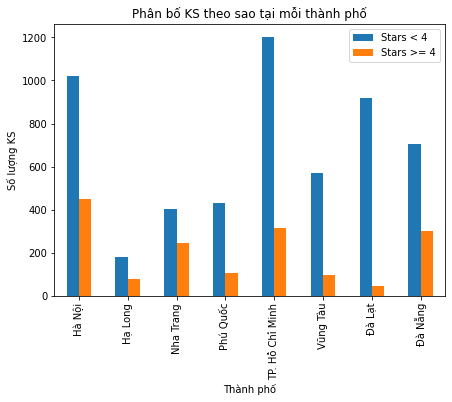

In [ ]:
city_df[['Stars < 4', 'Stars >= 4']].plot(kind="bar", figsize=(7,5))
plt.title("Phân bố KS theo sao tại mỗi thành phố")
plt.xlabel("Thành phố")
plt.ylabel("Số lượng KS")

Text(0, 0.5, 'Số lượng KS')

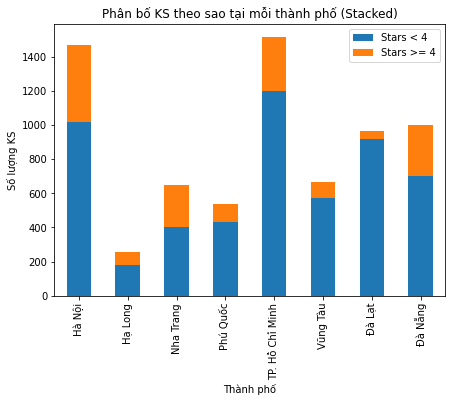

In [ ]:
city_df[['Stars < 4', 'Stars >= 4']].plot(kind="bar", figsize=(7,5), stacked=True)
plt.title("Phân bố KS theo sao tại mỗi thành phố (Stacked)")
plt.xlabel("Thành phố")
plt.ylabel("Số lượng KS")

Text(0, 0.5, 'Số lượng KS')

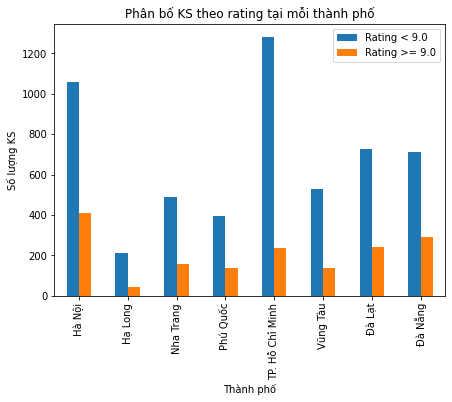

In [ ]:
city_df[['Rating < 9.0', 'Rating >= 9.0']].plot(kind="bar", figsize=(7,5))
plt.title("Phân bố KS theo rating tại mỗi thành phố")
plt.xlabel("Thành phố")
plt.ylabel("Số lượng KS")

Text(0, 0.5, 'Số lượng KS')

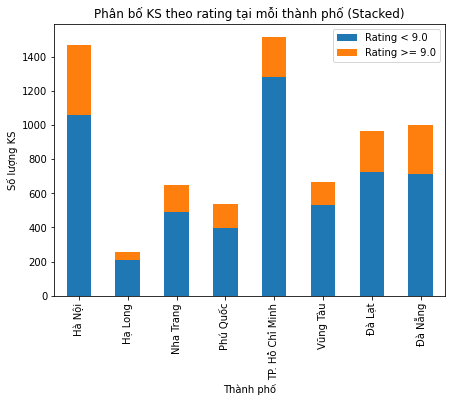

In [ ]:
city_df[['Rating < 9.0', 'Rating >= 9.0']].plot(kind="bar", figsize=(7,5), stacked=True)
plt.title("Phân bố KS theo rating tại mỗi thành phố (Stacked)")
plt.xlabel("Thành phố")
plt.ylabel("Số lượng KS")

# **EDA về Price**



*   **Mối quan hệ giữa Giá cả và các thuộc tính (Thành phố, Số sao KS, Điểm rating, Tiện ích KS)**



In [ ]:
min_price_df = eda_hotels.copy(deep=True)

Text(0, 0.5, 'Giá phòng')

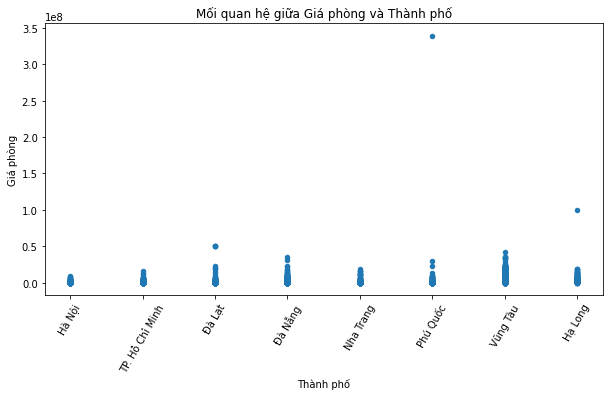

In [ ]:
min_price_df.plot(kind='scatter', x='City', y='Price',
                  colormap='viridis', figsize=(10,5))
plt.title('Mối quan hệ giữa Giá phòng và Thành phố')
plt.xticks(rotation=60, horizontalalignment="center")
plt.xlabel('Thành phố')
plt.ylabel('Giá phòng')

Text(0, 0.5, 'Giá phòng')

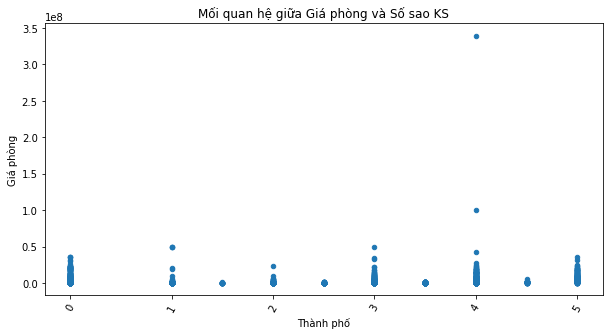

In [ ]:
min_price_df.plot(kind='scatter', x='Stars', y='Price',
                  colormap='viridis', figsize=(10,5))
plt.title('Mối quan hệ giữa Giá phòng và Số sao KS')
plt.xticks(rotation=60, horizontalalignment="center")
plt.xlabel('Thành phố')
plt.ylabel('Giá phòng')

Text(0, 0.5, 'Giá phòng')

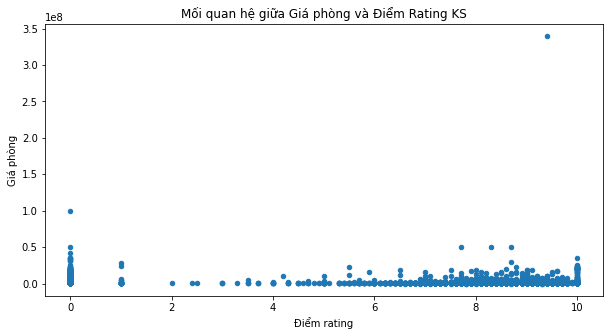

In [ ]:
min_price_df.plot(kind='scatter', x='Rating', y='Price',
                  colormap='viridis', figsize=(10,5))
plt.title('Mối quan hệ giữa Giá phòng và Điểm Rating KS')
#plt.xticks(rotation=60, horizontalalignment="center")
plt.xlabel('Điểm rating')
plt.ylabel('Giá phòng')

In [ ]:
min_price_df.loc[min_price_df['Rating']==0]

,City,Hotel name,Stars,Price,Rating,Number of reviews,Facilities,Nearby places
5,Hà Nội,Căn hộ Mới Sumitomo Hotel & Service Apartment ...,0.0,824500,0.0,0,Wi-Fi miễn phí;Chỗ đỗ xe miễn phí;Sân vư...,"Công viên Thủ Lệ, 0,2 km;Đại học RMIT, 0,3 km;..."
64,Hà Nội,Căn hộ Rose Apartment,0.0,450000,0.0,0,Wi-Fi miễn phí;Chỗ đỗ xe;Điều hòa nhiệt độ,"Hồ Thiền Quang, 0,2 km;Cung Văn Hóa Hữu nghị, ..."
69,Hà Nội,"Căn hộ Mới Vinhomes Skylake Pham Hung, Hà Nội,...",0.0,1700000,0.0,0,1 hồ bơi;Trung tâm thể dục;Phòng gia đình;...,"Tòa nhà Keangnam Hanoi Landmark Tower, 0,3 km;..."
75,Hà Nội,Căn hộ Mới Anthyhouse - Studio Apt in Greenbay...,0.0,800000,0.0,0,Chỗ đỗ xe;Sân thượng/ hiên;Sân vườn;Điều h...,"Tòa nhà Keangnam Hanoi Landmark Tower, 1,8 km;..."
82,Hà Nội,Chỗ nghỉ nhà dân Mới Jasmine Homestay,0.0,486000,0.0,0,Xe đưa đón sân bay;Phòng không hút thuốc;Đ...,"Nhà thờ Thánh Joseph, 0,2 km;National Library ..."
...,...,...,...,...,...,...,...,...
6157,Hạ Long,Du thuyền Indochina Sails,5.0,7896065,0.0,0,Máy lạnh;Nhà hàng;Lễ tân 24h;WiFi,"Bãi biển Tuần Châu, 786 m;Bệnh viện quốc tế Vi..."
6158,Hạ Long,Khách sạn Ann,3.0,761300,0.0,2,Máy lạnh,"Đảo Quan Lạn, 596 m;Bãi Gót, 6.26 km;Dòng Sôn..."
6159,Hạ Long,Du thuyền Garden Bay Premium,4.0,9394399,0.0,1,Máy lạnh;Nhà hàng;Lễ tân 24h;WiFi,"Japanese Garden, 340 m;Bệnh viện quốc tế Vinme..."
6160,Hạ Long,Gray Line Halong Cruise,4.0,18018401,0.0,1,Máy lạnh;Nhà hàng;Lễ tân 24h;WiFi,"Bãi biển Tuần Châu, 265 m;Bệnh viện quốc tế Vi..."


In [ ]:
#Check tiện ích rỗng
min_price_df.loc[min_price_df['Facilities'].isnull()==True]

,City,Hotel name,Stars,Price,Rating,Number of reviews,Facilities,Nearby places
2166,Đà Lạt,Căn hộ Garden View Full Villa- 8 Rooms,0.0,5499999,8.5,2,NaN,"Dinh Bảo Đại, 1 km;Khách sạn Hằng Nga, 1,4 km;..."
2313,Đà Lạt,Căn hộ thao ha,3.0,633600,8.7,23,NaN,"Chùa Lâm Tỳ Ni, 0,3 km;Cam Ly Waterfalls, 0,7 ..."
2321,Đà Lạt,Chỗ nghỉ nhà dân Bắp và Bơ Homestay,0.0,332500,8.0,1,NaN,"Chợ Đà Lạt, 0,3 km;Hồ Xuân Hương, 0,7 km;Lam V..."
2341,Đà Lạt,Căn hộ Mới HANZ Minh Phuong Homestay,3.0,810000,0.0,0,NaN,"Chợ Đà Lạt, 0,3 km;Lam Vien Square, 0,7 km;Hồ ..."
2420,Đà Lạt,Căn hộ Quỳnh House,0.0,1100000,9.6,2,NaN,"Chùa Lâm Tỳ Ni, 0,4 km;Cam Ly Waterfalls, 0,7 ..."
...,...,...,...,...,...,...,...,...
6134,Hạ Long,Khách sạn Việt Thanh,2.0,480000,7.6,18,NaN,"Long Tien Pagoda, 135 m;Bệnh viện quốc tế Vinm..."
6152,Hạ Long,Khách sạn Tuần Châu Marina,2.0,2000000,0.0,5,NaN,"Bãi biển Tuần Châu, 261 m;Bệnh viện quốc tế Vi..."
6568,Đà Lạt,Dalat De Charme Village,3.0,906412,8.8,88,NaN,Dinh Nguyễn Hữu Hào – cung Nam Phương Hoàng Hậ...
6759,Đà Nẵng,Khách sạn EX Đà Nẵng Luxury,3.0,507015,9.8,30,NaN,"Ngôi Nhà Đảo Ngược Đà Nẵng, 640 m;Sun World Da..."


In [ ]:
# Chuyển giá trị NaN tiện ích về list rỗng
min_price_df.loc[min_price_df['Facilities'].isnull(),['Facilities']] = min_price_df.loc[min_price_df['Facilities'].isnull(),'Facilities'].apply(lambda x: [])

In [ ]:
# Chuyển giá trị list từ string về list
for i in range(len(min_price_df['Facilities'])):
  if min_price_df['Facilities'][i]:
    min_price_df['Facilities'][i] = list(min_price_df['Facilities'][i].split(";"))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# Chuyển giá trị list từ string về list
for i in range(len(min_price_df['Facilities'])):
  min_price_df['Facilities'][i] = len(min_price_df['Facilities'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Giá phòng')

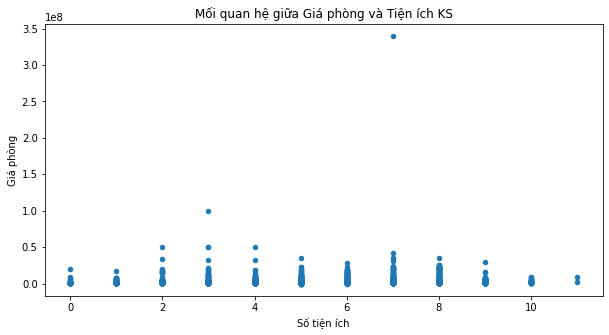

In [ ]:
min_price_df.plot(kind='scatter', x='Facilities', y='Price',
                  colormap='viridis', figsize=(10,5))
plt.title('Mối quan hệ giữa Giá phòng và Tiện ích KS')
#plt.xticks(rotation=60, horizontalalignment="center")
plt.xlabel('Số tiện ích')
plt.ylabel('Giá phòng')



*   **Tương quan chung giữa các thuộc tính Giá-Sao-Rating-Tiện ích**




In [ ]:
demo = min_price_df.copy(deep=True)

In [ ]:
demo['Facilities']=demo['Facilities'].astype('float64')
demo['Stars']=demo['Stars'].astype('float64')
demo['Rating']=demo['Rating'].astype('float64')
demo['Price']=demo['Price'].astype('float64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Text(0.5, 1.0, 'Tương quan giữa các thuộc tính ')

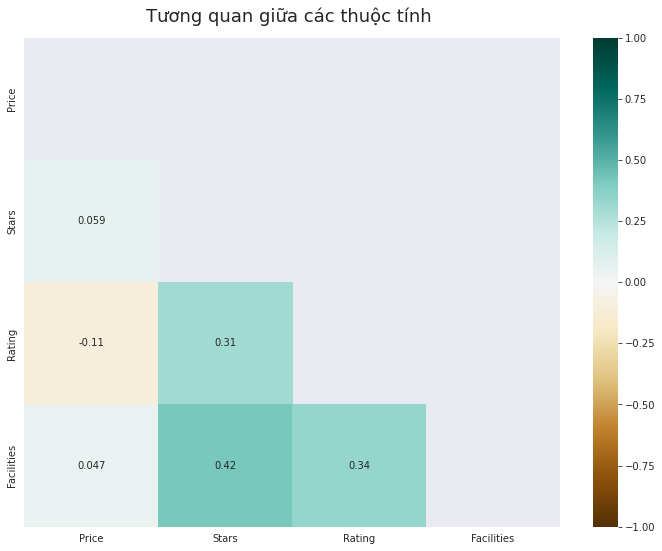

In [ ]:
# Tính tương quan
corr = demo[['Price', 'Stars', 'Rating', 'Facilities']].corr()
# print(corr)

sns.set_style('dark')
plt.figure(figsize=(12, 9))
# define the mask to set the values in the upper triangle to True

# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)]=True

mask = np.triu(np.ones_like(corr, dtype=np.bool))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG', mask=mask)
heatmap.set_title('Tương quan giữa các thuộc tính ', fontdict={'fontsize':18}, pad=16)



*   **Khoảng giá và phân bố KS theo khoảng giá**



In [ ]:
min_price_df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Stars,Price,Rating,Number of reviews
count,7060.00000,7060.00000,7060.00000,7060.00000
mean,2.26494,1494647.35340,7.08487,176.33442
std,1.57870,5234637.47445,3.17104,414.24433
min,0.00000,20804.00000,0.00000,0.00000
25%,1.00000,410000.00000,7.30000,4.00000
50%,3.00000,650000.00000,8.40000,36.50000
75%,3.00000,1100000.00000,8.90000,164.00000
max,5.00000,339188908.00000,10.00000,6441.00000


Ta có thể chia thành 4 khoảng giá: 
  
    0: 0-500k; 

    1: 500-1tr; 
  
    2: 1-2tr; 

    3: trên 2tr

In [ ]:
def get_output(x):
  if x <= 500000:
    return 0
  elif x > 500000 and x <= 1000000:
    return 1
  elif x > 1000000 and x <= 2000000:
    return 2
  else:
    return 3

In [ ]:
# Thêm cột để tiện eda
new_ls = []

for i in range(len(min_price_df['Price'])):
  new_ls.append(get_output(min_price_df['Price'][i]))

min_price_df['Price Interval'] = new_ls

In [ ]:
min_price_df.head(10)

,City,Hotel name,Stars,Price,Rating,Number of reviews,Facilities,Nearby places,Price Interval
0,Hà Nội,Khách sạn HANZ Regal Hotel Hanoi,2.0,421890,7.8,86,7,"Hồ Ngọc Khánh, 0,3 km;Trung tâm thương mại Vin...",0
1,Hà Nội,Khách sạn La Nueva Boutique Hotel Hanoi & Spa,4.0,1316000,9.3,209,8,"Nhà hát múa rối Thăng Long, 0,1 km;Đền Ngọc Sơ...",2
2,Hà Nội,Khách sạn La Storia Ruby Hotel,3.0,625000,9.6,217,6,"Quảng Trường Đông Kinh Nghĩa Thục, 0,4 km;Nhà ...",1
3,Hà Nội,Khách sạn LeaH Silk Hotel,4.0,1800000,9.1,72,8,"Nhà thờ Thánh Joseph, 0,3 km;Quảng Trường Đông...",2
4,Hà Nội,Khách sạn Babylon Premium Hotel & Spa,4.0,1262250,9.4,627,7,"Quảng Trường Đông Kinh Nghĩa Thục, 0,3 km;Nhà ...",2
5,Hà Nội,Căn hộ Mới Sumitomo Hotel & Service Apartment ...,0.0,824500,0.0,0,4,"Công viên Thủ Lệ, 0,2 km;Đại học RMIT, 0,3 km;...",1
6,Hà Nội,Khách sạn Bella Rosa Suite Hotel & Spa,3.0,832500,9.2,339,7,"Nhà hát múa rối Thăng Long, 0 km;Đền Ngọc Sơn,...",1
7,Hà Nội,Khách sạn The Noble Swan Hotel & Spa,4.0,510000,8.5,553,7,"Nhà thờ Thánh Joseph, 0,2 km;Quảng Trường Đông...",1
8,Hà Nội,Khách sạn Hanoi House Hostel & Travel,3.0,252000,9.0,570,6,"The Opera Night Club, 0,1 km;1900 Le Theatre, ...",0
9,Hà Nội,Khách sạn Luxury Old Quarter Hotel & Gym,4.0,756000,9.2,237,6,"Đền Bạch Mã, 0,3 km;Quảng Trường Đông Kinh Ngh...",1


In [ ]:
df = min_price_df.groupby(['Price Interval'])['Price Interval'].count()

Text(0, 0.5, 'Khoảng giá')

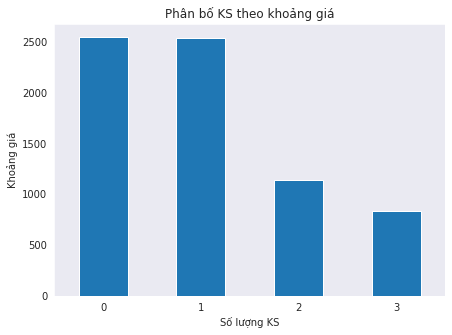

In [ ]:
#matplotlib.style.use('fivethirtyeight')
#sns.set_style("dark")
df.plot.bar(figsize=(7,5))
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Phân bố KS theo khoảng giá")
plt.xlabel("Số lượng KS")
plt.ylabel("Khoảng giá")

In [ ]:
df = min_price_df.groupby(['City','Price Interval'])['City'].count()


City               Price Interval
Hà Nội             0                 499
                   1                 623
                   2                 278
                   3                  69
Hạ Long            0                  17
                   1                  69
                   2                  65
                   3                 105
Nha Trang          0                 288
                   1                 218
                   2                  99
                   3                  44
Phú Quốc           0                 165
                   1                 225
                   2                  88
                   3                  58
TP. Hồ Chí Minh  0                 593
                   1                 570
                   2                 264
                   3                  89
Vũng Tàu           0                  44
                   1                 183
                   2                 139
                   3   

In [ ]:
p_0 = []
p_1 = []
p_2 = []
p_3 = []
for i in range(len(df)):
  if (i%4==0):
    p_0.append(df[i])
  elif (i%4==1):
    p_1.append(df[i])
  elif (i%4==2):
    p_2.append(df[i])
  else:
    p_3.append(df[i])

In [ ]:
#Tạo df mới chứa các columns cần thiết
p_name = {'City':{0:'Hà Nội', 1:'Hạ Long', 2:'Nha Trang', 3:'Phú Quốc',
             4:'TP. Hồ Chí Minh', 5:'Vũng Tàu', 6:'Đà Lạt', 7:'Đà Nẵng'}}
price_int_df = pd.DataFrame(p_name)
price_int_df['Giá <= 500.00đ'] = p_0
price_int_df['500.000đ < Giá <= 1.000.00đ'] = p_1
price_int_df['1.000.000đ < Giá <= 2.000.00đ'] = p_2
price_int_df['Giá > 2.000.000đ'] = p_3

#Set index
price_int_df.set_index("City", inplace = True)

In [ ]:
price_int_df

,Giá <= 500.00đ,500.000đ < Giá <= 1.000.00đ,1.000.000đ < Giá <= 2.000.00đ,Giá > 2.000.000đ
City,,,,
Hà Nội,499,623,278,69
Hạ Long,17,69,65,105
Nha Trang,288,218,99,44
Phú Quốc,165,225,88,58
TP. Hồ Chí Minh,593,570,264,89
Vũng Tàu,44,183,139,302
Đà Lạt,493,309,97,65
Đà Nẵng,448,343,106,105


Text(0, 0.5, 'Số lượng KS')

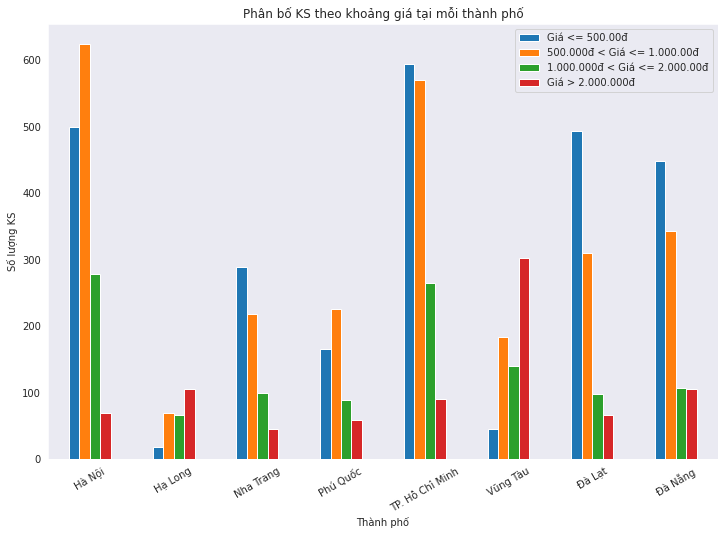

In [ ]:
price_int_df[['Giá <= 500.00đ', '500.000đ < Giá <= 1.000.00đ', 
              '1.000.000đ < Giá <= 2.000.00đ', 'Giá > 2.000.000đ']].plot(kind="bar", figsize=(12,8))
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Phân bố KS theo khoảng giá tại mỗi thành phố")
plt.xlabel("Thành phố")
plt.ylabel("Số lượng KS")